In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dfT= pd.read_csv("6dfd4f8f-cbf5-4917-a5eb-fd07f4403167.csv")
dfT.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


In [3]:
dfT.neighborhood.value_counts()

Squirrel Hill South    28
Bloomfield             21
Shadyside              18
Highland Park          16
East Liberty           16
                       ..
Allegheny Center        1
Upper Lawrenceville     1
Duquesne Heights        1
Regent Square           1
Crawford-Roberts        1
Name: neighborhood, Length: 74, dtype: int64

In [4]:
for col in dfT.columns:
    print(col)

id
device_id
record_oid
count_start_date
count_end_date
average_daily_car_traffic
average_daily_bike_traffic
counter_number
counter_type
speed_limit
max_speed
median_speed
percent_over_limit
speed85_percent
speed95_percent
longitude
latitude
neighborhood
council_district
ward
tract
public_works_division
pli_division
police_zone
fire_zone


<AxesSubplot:ylabel='Density'>

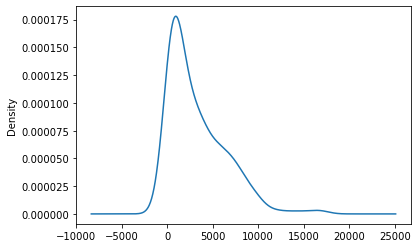

In [5]:
dfT['average_daily_car_traffic'].plot.density()

In [6]:
dfT['average_daily_car_traffic'].count()

286

In [7]:
dfT['neighborhood'].count()

418

In [10]:
dfT2 = dfT[['average_daily_car_traffic', 'neighborhood']]

In [11]:
dfT2.head()

,average_daily_car_traffic,neighborhood
0,4949.0,Polish Hill
1,NaN,Central Lawrenceville
2,NaN,Windgap
3,2741.0,Squirrel Hill South
4,NaN,Perry North


In [12]:
dfT3=dfT2[dfT2['average_daily_car_traffic'].notna()]

In [13]:
dfT3

,average_daily_car_traffic,neighborhood
0,4949.0,Polish Hill
3,2741.0,Squirrel Hill South
5,1046.0,Central Northside
7,3015.0,Polish Hill
10,5592.0,Squirrel Hill South
...,...,...
402,5605.0,Greenfield
404,809.0,Central Northside
410,910.0,Bloomfield
411,271.0,Bloomfield


In [14]:
dfT3['neighborhood'].count()

285

<AxesSubplot:ylabel='Density'>

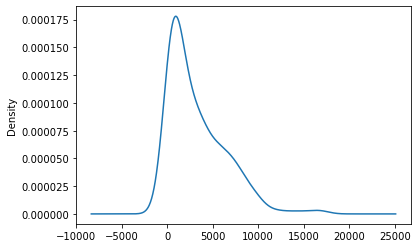

In [15]:
dfT3['average_daily_car_traffic'].plot.density()

In [16]:
dfT3['average_daily_car_traffic'].describe()

count      286.000000
mean      3275.080420
std       3145.750272
min         23.000000
25%        766.500000
50%       2312.500000
75%       5248.750000
max      16729.000000
Name: average_daily_car_traffic, dtype: float64

In [17]:
dfT.ward.value_counts()

14.0    56
19.0    30
11.0    28
13.0    23
26.0    23
8.0     22
4.0     21
7.0     18
12.0    16
6.0     14
21.0    13
16.0    13
10.0    13
9.0     12
20.0    12
15.0    12
27.0    11
29.0    10
1.0     10
22.0     9
28.0     9
17.0     7
25.0     6
2.0      6
5.0      6
32.0     5
18.0     4
24.0     4
30.0     2
31.0     2
23.0     1
3.0      1
Name: ward, dtype: int64

In [18]:
dfT3.neighborhood.value_counts()

Squirrel Hill South    26
Shadyside              15
Highland Park          15
Bloomfield             14
East Liberty           11
                       ..
St. Clair               1
Regent Square           1
Allegheny West          1
Overbrook               1
West Oakland            1
Name: neighborhood, Length: 64, dtype: int64

In [19]:
best_hood=dfT3.sort_values(['average_daily_car_traffic','neighborhood'])\
                                   .groupby('neighborhood')\
                                   .mean()\
                                   .reset_index()

In [20]:
best_hood

,neighborhood,average_daily_car_traffic
0,Allegheny Center,2386.000000
1,Allegheny West,477.000000
2,Arlington,2285.500000
3,Beechview,1418.333333
4,Beltzhoover,1577.000000
...,...,...
59,Summer Hill,937.000000
60,Upper Hill,953.333333
61,West Oakland,2585.000000
62,Westwood,7700.000000


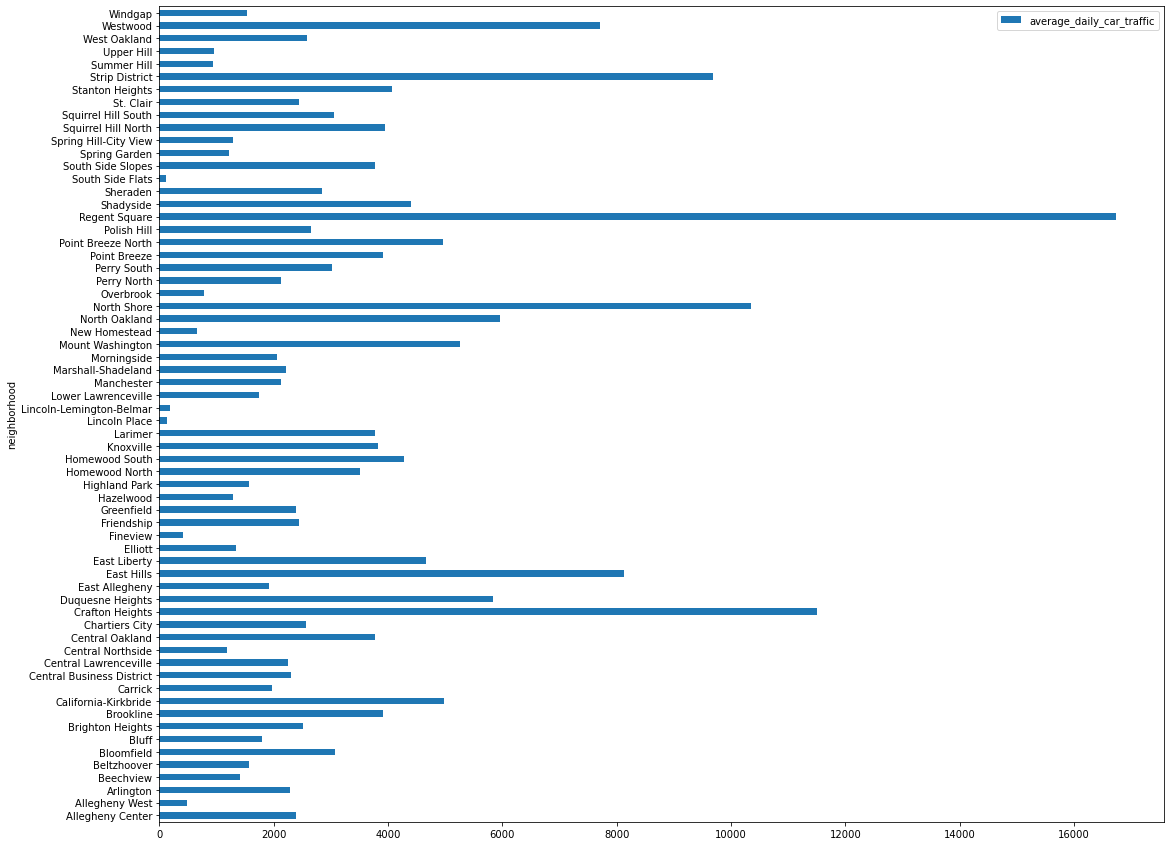

In [21]:
ax = best_hood.plot.barh(x='neighborhood', y='average_daily_car_traffic', figsize=(18,15))